In [1]:
%load_ext rpy2.ipython
from IPython.display import FileLink

In [2]:
%%R
library(ggplot2)
#library(rwantshue)
library(grid); library(gridExtra)
library(magrittr)
library(TSclust)
library(tidyr)
library(dplyr)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: wmtsa

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: splus2R

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: ifultools

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: MASS

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: pdc

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: Use

In [3]:
%%R
mdf = read.csv('Fungal_mdf_CLRtransform.csv')
head(mdf)

       X    OTU          Sample Abundance     Full.sample Fraction PrimerF
1 149434 OTU.27 Sept.NTH.1.2015  13.78841 Sept.NTH.1.2015       NA  nBITSf
2 135272 OTU.25  Oct.NTR.3.2015  13.26636  Oct.NTR.3.2015       NA  nBITSf
3 407197 OTU.81  Aug.NTH.1.2015  12.85074  Aug.NTH.1.2015       NA  nBITSf
4 396068 OTU.76  Aug.NTH.1.2015  12.43413  Aug.NTH.1.2015       NA  nBITSf
5 407118 OTU.81  Aug.NTH.4.2015  12.42164  Aug.NTH.4.2015       NA  nBITSf
6 200854 OTU.35    July14.PTR.4  12.37327    July14.PTR.4       NA  nBITSf
  PrimerR Barcode Rev.index Fwd.index Treatment Day Pool     Experiment
1   58A2r     136  gatctacg  gacaccgt       NTH  NA    5 Chazy.ITS.Bulk
2   58A2r     166  gcgtatac  cgtgagtg       NTR  NA    5 Chazy.ITS.Bulk
3   58A2r     119  tagcagct  ggatatct       NTH  NA    5 Chazy.ITS.Bulk
4   58A2r     119  tagcagct  ggatatct       NTH  NA    5 Chazy.ITS.Bulk
5   58A2r     131  gatctacg  tagcgagt       NTH  NA    5 Chazy.ITS.Bulk
6   58A2r      70  actacgac  cgtgagtg      

In [98]:
%%R
mdf$Treat_Rep = paste(mdf$Land_Management, mdf$Replicate, sep = '_')
NTR = filter(mdf, Land_Management == "NTR")
NTH = filter(mdf, Land_Management == "NTH")
PTR = filter(mdf, Land_Management == "PTR")
PTH = filter(mdf, Land_Management == "PTH" & Replicate == 2)
test = PTH %>% select(OTU, Sample_Date, Abundance) %>% 
        spread(OTU, Abundance) #%>%
        #select(-Treat_Rep)

rownames(test) = test$Sample_Date
test$Sample_Date = NULL
head(test, n= 11)

         OTU.10008   OTU.1001   OTU.1004 OTU.10054   OTU.1008 OTU.10080
10/27/15         0  1.2305296  0.0000000         0  2.2305296         0
10/29/14         0  0.0000000  0.0000000         0  0.0000000         0
11/25/15         0  3.7950920  0.0000000         0  2.9325955         0
11/26/14         0  0.0000000  0.0000000         0  0.0000000         0
4/30/15          0  0.0000000  0.0000000         0  0.0000000         0
6/17/15          0  0.0000000  0.0000000         0  0.0000000         0
7/10/14          0  0.0000000 -0.2424367         0  0.0000000         0
7/16/15          0  0.0000000  0.0000000         0  0.0000000         0
8/13/15          0  5.4130865  0.0000000         0  0.0000000         0
9/23/15          0 -0.3969343  0.0000000         0 -0.3969343         0
9/24/14          0 -0.2028170  0.0000000         0  0.0000000         0
         OTU.10088 OTU.1009 OTU.10117   OTU.1012 OTU.1013 OTU.10148 OTU.10156
10/27/15         0        0         0 -0.3544329 3.104999 

In [99]:
%%R
test[test == 0] <- 0.01

In [102]:
%%R
#trans.test = log(test[2:11,]) - log(test[1:10,])
#head(trans.test)

NULL


In [ ]:
%%R
#Do for each treatment, replicate??
tsdist <- diss( t(test) , "ACF", p=0.05)


In [107]:
%%R
head(tsdist)

[1] NaN NaN NaN NaN NaN NaN


In [1]:
%%R
hc <- hclust(tsdist)


ERROR: Cell magic `%%R` not found.


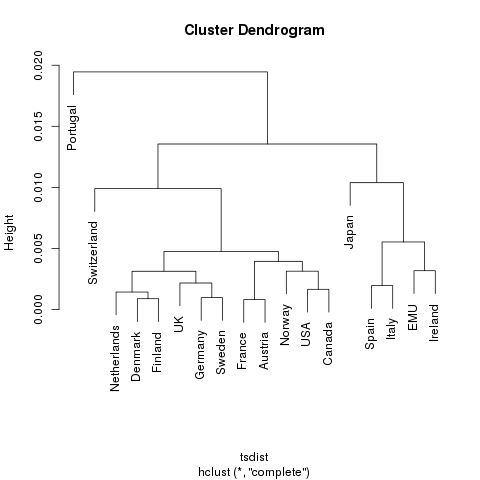

In [75]:
%%R
plot(hc)

In [ ]:
%%R
mahdist <- diss( t(test) , "AR.MAH", p=0.05)$p_value
 
p = pvalues.clust(mahdist, 0.05)

In [ ]:
%%R
tsdist <- diss( t(trans.inter.rates) , "ACF", p=0.05)

In [ ]:
###transformation of the interest rates
trans.inter.rates <- log(interest.rates[2:215,]) - log(interest.rates[1:214,])
 
##use the dist function of the proxy package to easily create the dist object
#applying ACF with geometric decaying to each pair of time series
tsdist <- diss( t(trans.inter.rates) , "ACF", p=0.05)
 
names(tsdist) <- colnames(interest.rates)
 
#perform hierachical clustering to the dist object
hc <- hclust(tsdist)
 
#show the results
plot(hc)
 
mahdist <- diss( t(trans.inter.rates) , "AR.MAH", p=0.05)$p_value
 
pvalues.clust(mahdist, 0.05)

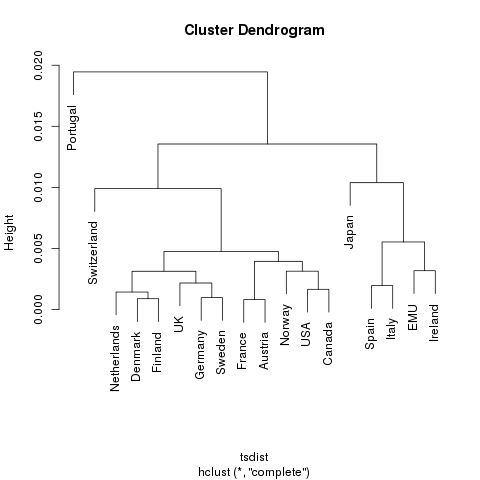

In [42]:
%%R
data(interest.rates)
###transformation of the interest rates
trans.inter.rates <- log(interest.rates[2:215,]) - log(interest.rates[1:214,])
 
##use the dist function of the proxy package to easily create the dist object
#applying ACF with geometric decaying to each pair of time series
tsdist <- diss( t(trans.inter.rates) , "ACF", p=0.05)
 
names(tsdist) <- colnames(interest.rates)
 
#perform hierachical clustering to the dist object
hc <- hclust(tsdist)
 
#show the results
plot(hc)
 


In [44]:
%%R
mahdist <- diss( t(trans.inter.rates) , "AR.MAH", p=0.05)$p_value
 
pvalues.clust(mahdist, 0.05)

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
